In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hw6_tips.csv")
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
avg_day = df.groupby("day")[["total_bill", "tip"]].sum()
avg_day

,total_bill,tip
day,,
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39
Thur,1096.33,171.83


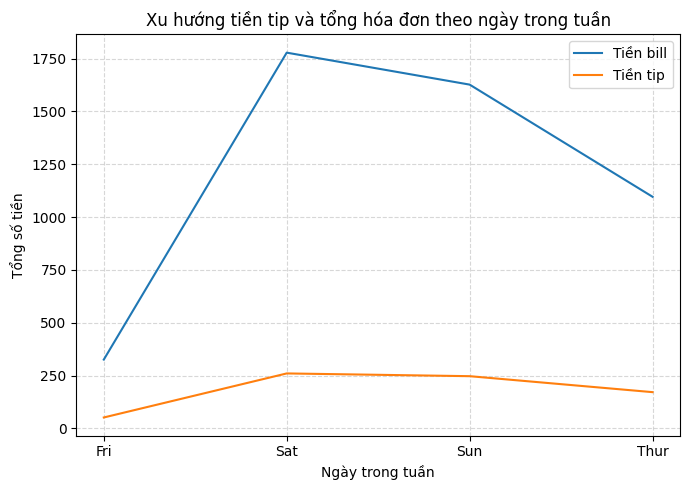

In [19]:
plt.figure(figsize=(7, 5))
plt.plot(avg_day["total_bill"], label="Tiền bill")
plt.plot(avg_day["tip"], label="Tiền tip")

plt.title("Xu hướng tiền tip và tổng hóa đơn theo ngày trong tuần")
plt.xlabel("Ngày trong tuần")
plt.ylabel("Tổng số tiền")
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()

plt.show()